In calculation, the atomic unit is applied.

$800 nm -> \omega_0 = 0.057 a.u.$, $400 nm -> \omega_1 = 0.114 a.u.$

Conversion relationship between wavelength and frequency, $f = C/\omega$, $C = 137 \ in\  a.u.$

The fundamental frequency is $800 nm$.

In [9]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [10]:
omega_0 = 0.057

Define the pulse duration of laser in atomic unit, here $~ 15 fs$. $1fs = 41 a.u.$

In [11]:
width = 5.0 * 41.0

Define the electronic field amplitude of laser, $ I \ in \ Wcm^{-2} = 3.51 \times 10^{16} \times (E^2 \ in \ a.u.) $

In [12]:
width

205.0

In [13]:
E = 0.08

Define the sampling in time domain, $0.05 \ fs$ is feasible for $400 \ nm$, corresponding to $~ 2 \ a.u.$.

In [14]:
dt = 0.1
t_n = arange (-500, 500, dt)

In [15]:
t_n

array([-500. , -499.9, -499.8, ...,  499.7,  499.8,  499.9])

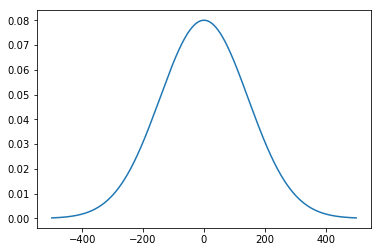

In [16]:
%matplotlib inline
env_0 = E * exp (- t_n ** 2 / width ** 2)
plot(t_n, env_0)

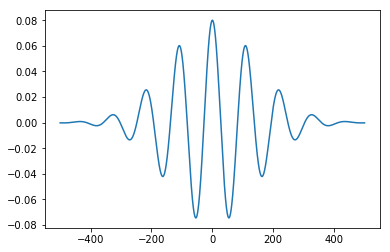

In [17]:
E_0 = env_0 * cos(omega_0 * t_n)
plot(t_n, E_0)

$A(t)=-\int{E(t)dt}$

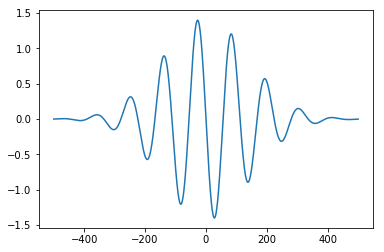

In [18]:
A = zeros(E_0.size, float)
for i in xrange(E_0.size - 1):
    A[i + 1] = A[i] + E_0[i] * dt
A_0 = - A
plot (t_n, A_0)

Define the dipole function, $D(p)=-i2^{7/2}p/[\pi(p^2+1)^3]$

In [19]:
def Dipole(p):
    return - 1j * 2**(7/2) * p / (pi * (p**2 + 1)**3)

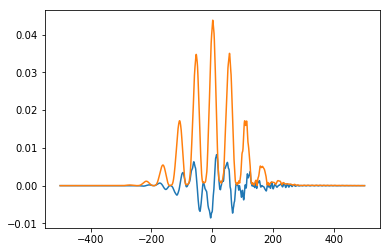

In [22]:
import numpy as np

hhg_temp = zeros (A_0.size, dtype = complex)

for i in xrange(A_0.size - 1):
    
    A_int = 0.0
    hhg_int = np.complex(0.0)
    S_int = 0.0
    D_co = np.complex(0.0)
    D = np.complex(0.0)
    
    for j in xrange(1, i):
        A_int = A_int + A_0[i - j] * dt
        p_pm = - A_int / (j * dt)
        D_co = np.conj(Dipole (p_pm + A_0[i]))
        D = Dipole (p_pm + A_0[i - j])
        S_int = S_int + (0.5 * (p_pm + A_0[i - j]) ** 2 + 0.5) * dt
        hhg_int = hhg_int + (2 * pi /(1j * j * dt))**1.5 * D_co * D * E_0[i - j] * exp(-1j * S_int) * dt
        
    
    hhg_temp[i] = hhg_int
    
hhg_temp = -1j * hhg_temp
plot(t_n, imag(hhg_temp))
plot(t_n, abs(hhg_temp))

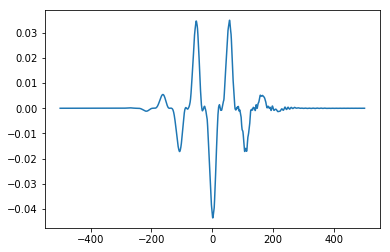

In [31]:
plot(t_n, real(hhg_temp))
#xlim(-50, 0)

(0, 500)

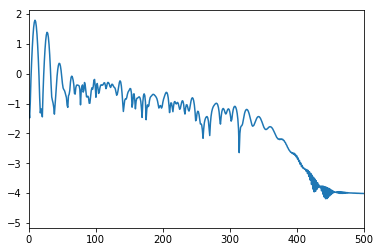

In [26]:
fre = fft.fft(2 * real(hhg_temp))
plot(log10(abs(fre)))
xlim([0, 500])

In [34]:
Up = 0.5 + 3.17 * 0.08 **2 /(4 * omega_0**2)

In [35]:
w = 2* pi* fft.fftfreq(len(t_n), dt)

(0, 3)

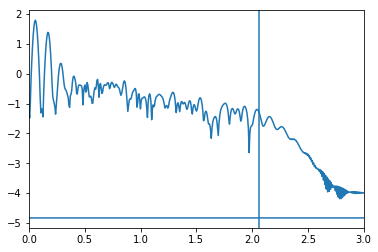

In [36]:
plot(w, log10(abs(fre)))
axvline(Up)
xlim(0,3)